In [17]:
%pip install tensorflow keras opencv-python matplotlib numpy
%pip install split-folders
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------------------------- -------------- 7.1/11.1 MB 39.6 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 36.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# F√∂r att spj√§lka data in i olika kataloger
Spj√§lker datan i tre kataloger train, val och test.

In [ ]:
import os
import shutil
import random

# S√∂kv√§gen till ditt dataset
INPUT_FOLDER = "cnn_data/"
OUTPUT_FOLDER = "cnn_data_split/"
SPLIT_RATIOS = (0.7, 0.2, 0.1)  # Train: 70%, Val: 20%, Test: 10%

# Skapa mapparna f√∂r split
for split in ["train", "val", "test"]:
    for category in ["snowboarder", "skier"]:
        os.makedirs(os.path.join(OUTPUT_FOLDER, split, category), exist_ok=True)

# Funktion f√∂r att splitta datasetet
def split_data(category):
    """Tar emot kategorin och spj√§lker datan i tre kataloger train, test och val"""
    img_dir = os.path.join(INPUT_FOLDER, category, "images")
    label_dir = os.path.join(INPUT_FOLDER, category, "labels")

    # H√§mta alla bildfiler
    img_files = sorted(os.listdir(img_dir))  # Sortera f√∂r s√§kerhets skull
    random.shuffle(img_files)  # Blanda datan

    # Ber√§kna antal filer per split
    total_files = len(img_files)
    train_idx = int(SPLIT_RATIOS[0] * total_files)
    val_idx = train_idx + int(SPLIT_RATIOS[1] * total_files)

    # Dela upp filerna
    splits = {
        "train": img_files[:train_idx],
        "val": img_files[train_idx:val_idx],
        "test": img_files[val_idx:]
    }

    # Kopiera filer till respektive mapp
    for split, files in splits.items():
        for file in files:
            img_path = os.path.join(img_dir, file)
            label_path = os.path.join(label_dir, file.replace(".jpg", ".txt"))

            # Kopiera bild
            shutil.copy(img_path, os.path.join(OUTPUT_FOLDER, split, category, file))

            # Kopiera label om den finns
            if os.path.exists(label_path):
                shutil.copy(label_path, os.path.join(OUTPUT_FOLDER, split, category, file.replace(".jpg", ".txt")))

# Splitta b√•de snowboarders och skiers
split_data("snowboarder")
split_data("skier")

print("‚úÖ Datasetet har delats upp i train, val och test!")



‚úÖ Datasetet har delats upp i train, val och test!


Kolla m√§ngden bilder i de olika katalogerna

In [31]:
import os

print("Train - snowboarder:", len(os.listdir("cnn_data_split/train/snowboarder")))
print("Train - skier:", len(os.listdir("cnn_data_split/train/skier")))
print("Val - snowboarder:", len(os.listdir("cnn_data_split/val/snowboarder")))
print("Val - skier:", len(os.listdir("cnn_data_split/val/skier")))
print("Test - snowboarder:", len(os.listdir("cnn_data_split/test/snowboarder")))
print("Test - skier:", len(os.listdir("cnn_data_split/test/skier")))


Train - snowboarder: 1336
Train - skier: 1340
Val - snowboarder: 382
Val - skier: 378
Test - snowboarder: 192
Test - skier: 336


# Tr√§na en modell med datan
Tr√§nar en modell med datan och ritar grafer av resultatet 

Found 1338 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Found 264 images belonging to 2 classes.
Epoch 1/15
42/42 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31s 615ms/step - accuracy: 0.5264 - loss: 0.7765 - val_accuracy: 0.5026 - val_loss: 0.6998
Epoch 2/15
42/42 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24s 580ms/step - accuracy: 0.4841 - loss: 0.7108 - val_accuracy: 0.5026 - val_loss: 0.7105
Epoch 3/15
42/42 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24s 572ms/step - accuracy: 0.5030 - loss: 0.6976 - val_accuracy: 0.5026 - val_loss: 0.6948
Epoch 4/15
42/42 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24s 574ms/step - accuracy: 0.5027 - loss: 0.6972 - val_accuracy: 0.5026 - val_loss: 0.6942
Epoch 5/15
42/42 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24s 572ms/step - accuracy: 0.5215 - loss: 0.6946 - val_accuracy: 0.5026 - val_loss: 0.6932
Epoch 6/15
42/42 ‚îÅ‚îÅ‚îÅ‚îÅ‚î

‚úÖ Modellens testnoggrannhet: 63.64%
‚úÖ Modell sparad som 'snowboard_vs_slalom_cnn.h5'


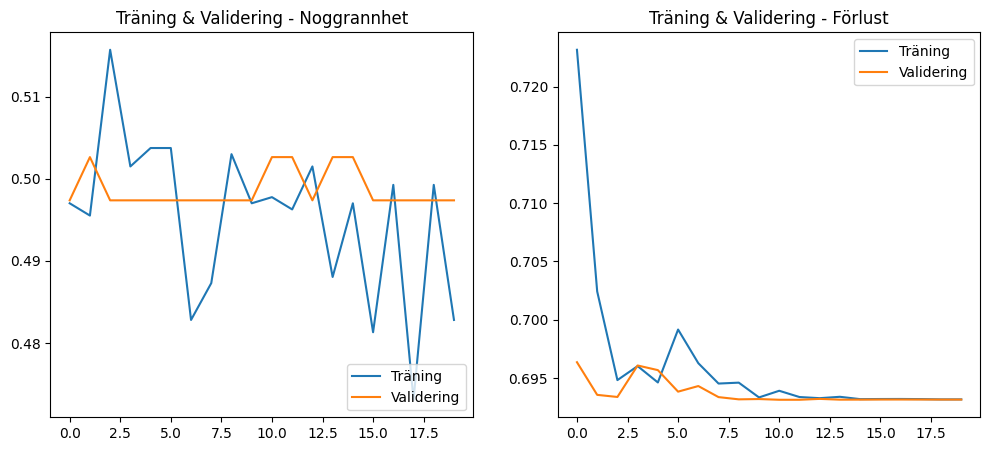

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization


IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,  
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    shear_range=0.2,  
    zoom_range=0.2,  
    horizontal_flip=True,
    fill_mode="nearest",
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    "cnn_data_split/train/",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
)

val_generator = val_test_datagen.flow_from_directory(
    "cnn_data_split/val/",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

test_generator = val_test_datagen.flow_from_directory(
    "cnn_data_split/test/",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)


# Ladda en f√∂rtr√§nad EfficientNetB0 utan topp-lager
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Frys basmodellens lager s√• de inte tr√§nas i f√∂rsta steget
base_model.trainable = True

# L√§gg till egna lager ovanp√• basmodellen
x = base_model.output
x = GlobalAveragePooling2D()(x)  
x = Dense(512, activation="relu")(x) 
x = BatchNormalization()(x)
x = Dropout(0.40)(x)  
predictions = Dense(1, activation="sigmoid")(x)  

# Skapa den slutliga modellen
model = Model(inputs=base_model.input, outputs=predictions)

# Kompilera modellen
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="binary_crossentropy",  
    metrics=["accuracy"]
)

# Tr√§na modellen med klassvikter
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    verbose=1
)
# L√•s upp de sista 40 lagren f√∂r vidare tr√§ning
base_model.trainable = True
for layer in base_model.layers[:-40]:  
    layer.trainable = False  

# Kompilera igen med en l√§gre inl√§rningshastighet
model.compile(
    optimizer=Adam(learning_rate=1e-4),  
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Tr√§na modellen vidare
history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    verbose=1,
    
)

loss, acc = model.evaluate(test_generator)
print(f"‚úÖ Modellens testnoggrannhet: {acc:.2%}")

model.save("snowboard_vs_slalom_cnn.h5")
print("‚úÖ Modell sparad som 'snowboard_vs_slalom_cnn.h5'")


def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))
    
    # Plotta tr√§ningens noggrannhet
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label="Tr√§ning")
    plt.plot(epochs_range, val_acc, label="Validering")
    plt.legend(loc="lower right")
    plt.title("Tr√§ning & Validering - Noggrannhet")

    # Plotta tr√§ningens f√∂rlustv√§rde
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label="Tr√§ning")
    plt.plot(epochs_range, val_loss, label="Validering")
    plt.legend(loc="upper right")
    plt.title("Tr√§ning & Validering - F√∂rlust")

    plt.show()

plot_training(history_fine)


# Testa modellen
Testar modellen med x bilder och visar resultatet

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0

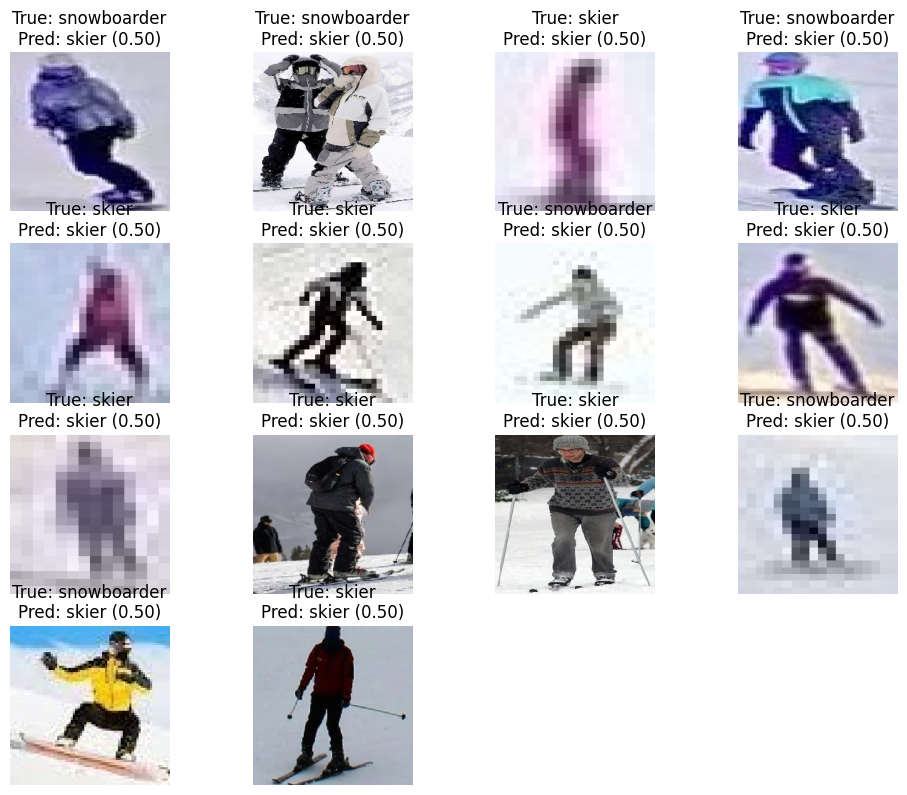

In [40]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Skapa en funktion f√∂r att g√∂ra f√∂ruts√§gelser och visa bilder
def test_sample_images(test_generator, model, num_images=10):
    # H√§mta batchar av bilder fr√•n testgeneratorn
    class_names = test_generator.class_indices
    class_names = {v: k for k, v in class_names.items()}  # Byt klassindex till klassnamn
    class_0, class_1 = list(class_names.values())
    
    # Skapa en lista f√∂r att lagra bilder och f√∂ruts√§gelser
    test_images = []
    test_labels = []
    predictions = []

    for i, (images, labels) in enumerate(test_generator):
        if i >= num_images // 2:
            break
        
        # F√∂r varje klass (f√∂rsta klassen: 0, andra klassen: 1)
        for j in range(images.shape[0]):
            image_input = np.expand_dims(images[j], axis=0)  # L√§gg till batch-dimensionen
            pred = model.predict(image_input)  # G√∂r en f√∂ruts√§gelse

            # L√§gg till bilden, etiketten och f√∂ruts√§gelsen i listorna
            test_images.append(images[j])
            test_labels.append(labels[j])
            predictions.append(pred[0][0])

            # Avsluta n√§r vi har samlat tillr√§ckligt med bilder fr√•n denna klass
            if len(test_images) >= num_images:
                break

    # Visa de 10 bilderna med f√∂ruts√§gelser
    plt.figure(figsize=(12, 12))
    for i in range(len(test_images)):
        plt.subplot(5, 4, i+1)
        img = test_images[i]
        label = test_labels[i]
        pred = predictions[i]

        # Konvertera f√∂ruts√§gelsen till 0 eller 1
        pred_class = class_1 if pred >= 0.5 else class_0

        # Visa bilden med etikett och f√∂ruts√§gelse
        plt.imshow(img)
        plt.title(f"True: {class_1 if label == 1 else class_0}\nPred: {pred_class} ({pred:.2f})")
        plt.axis("off")

    plt.show()

# Anv√§nd funktionen f√∂r att testa och visa bilder
test_sample_images(test_generator, model, num_images=10)


Testar p√• video hur modellen g√∂r av sig?

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model


MODEL_PATH = "snowboard_vs_slalom_cnn.h5"  # Se till att modellen finns i samma mapp
model = load_model(MODEL_PATH)


IMG_SIZE = (224, 224)  # Bildstorlek m√•ste matcha modellen

def preprocess_frame(frame):
    frame = cv2.resize(frame, IMG_SIZE) 
    frame = frame / 255.0  
    frame = np.expand_dims(frame, axis=0) 
    return frame


VIDEO_PATH = "./data/video2.mp4"  
cap = cv2.VideoCapture(VIDEO_PATH)

if not cap.isOpened():
    print("‚ö†Ô∏è Fel: Kunde inte √∂ppna videofilen!")
    exit()

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter("output.avi", fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while True:
    ret, frame = cap.read()
    if not ret:
        break  # Avsluta om videon √§r slut

    processed_frame = preprocess_frame(frame)  # F√∂rbered bilden
    prediction = model.predict(processed_frame)[0][0]  # G√∂r f√∂ruts√§gelse

    # Klassificering: 0 = Slalom√•kare, 1 = Snowboard√•kare
    label = "Snowboard√•kare" if prediction > 0.5 else "Slalom√•kare"
    confidence = int(prediction * 100) if prediction > 0.5 else int((1 - prediction) * 100)

  
    text = f"{label} ({confidence}%)"
    color = (0, 255, 0) if label == "Snowboard√•kare" else (255, 0, 0)
    
    cv2.putText(frame, text, (30, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    cv2.imshow("Video Klassificering", frame)

    out.write(frame)  # Spara bildrutan i filen


    # Tryck 'q' f√∂r att avsluta
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()
print("‚úÖ Videoklassificering avslutad!")




1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0

OSError: [Errno 22] Invalid argument: 'C:\\Projects\\VisionComp\\cv-25-project\\cnn_data_split\test\\snowboarder\x02_1.jpg_0.jpg'

Testning p√• vissa specifika bilder fr√•n datan

9/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 343ms/step - accuracy: 0.4156 - loss: 0.6950
Test Loss: 0.6954318881034851
Test Accuracy: 0.38257575035095215
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
üèÇ Prediktion: Snowboarder (0.51)


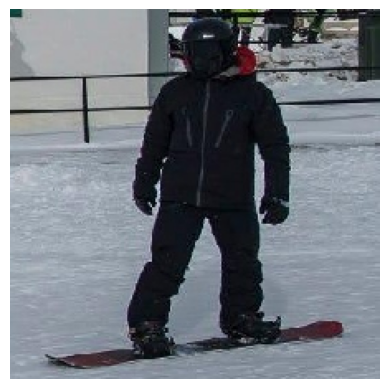

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step
üèÇ Prediktion: Snowboarder (0.51)


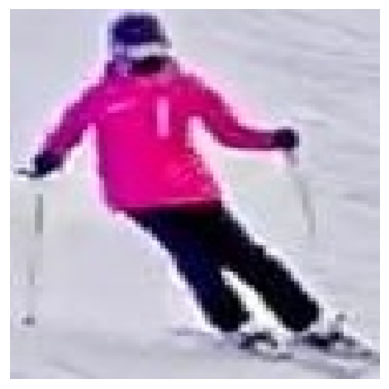

In [30]:
from tensorflow.keras.preprocessing import image

def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0  # Normalisera
    img_array = np.expand_dims(img_array, axis=0)  # L√§gg till batch-dimension
    
    prediction = model.predict(img_array)
    
    if prediction[0][0] > 0.5:
        print(f"üèÇ Prediktion: Snowboarder ({prediction[0][0]:.2f})")
    else:
        print(f"‚õ∑ Prediktion: Slalom√•kare ({1 - prediction[0][0]:.2f})")

    plt.imshow(img)
    plt.axis("off")
    plt.show()

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Testa p√• en bild
predict_image(model, "./cnn_data_split/test/snowboarder/6_1.jpg_0.jpg")  
predict_image(model, "./cnn_data_split/test/skier/609_0.jpg_0.jpg")